In [8]:
from sklearn.utils import shuffle
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

In [9]:
data = pd.read_pickle('final_dataset.pkl')
all_lyrics = data.lyrics.tolist()
#print(type(all_lyrics), all_lyrics[:5])

In [10]:
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["na", 'instrumental', 'yeah', 'ha', 'ok', 'babe', 'oo', 'baby', 
                                              'doo', 'ooh', 'da', 'hey', 'la', 'oh', 'whoa', 'choo', 'thoia', 
                                              'thoing', 'ah', 'nigga', 'niggas', 'boom', 'woo', 'chorus', 'wah',
                                              'eh', 'laa', 'll', 'ding', 'cha', 'ain', 'dee', 'don', 'shoo', 'ya',
                                              'yo', 'di', 'ba', 'hoo', 'ho', 'ha', 'cha', 've', 'fa', 'bwok',
                                              'bong', 'giddy', 'got', 'uh', 'ooo', 'coo', 'wa', 'ron', 'dah', 
                                              'bom', 'bop', 'bang', 'hmss', 'nah', 'ay', 'did', 'yeh', 'di',
                                              'du', 'mow', 'nay', 'iko', 'ahh', 'te', 'mi', 'em', 'ko', 'lol',
                                              'yeeeeeeeeeeaa', 'aah', 'ddu', 'blu', 'biddy', 'weh', 'ni', 'lil',
                                              'ohhh', 'wo', 'dong', 'gon', 'hah', 'dang', 'chh', 'mm', 'umm',
                                              'wee', 'ohhhh', 'dum', 'ta', 'oom', 'dit', 'goo', 'dop', 'oy',
                                              'baa', 'dem', 'ayy', 'dig', 'lennon', 'paul', 'mccartney', 'johnny',
                                              'yuh', 'sa', 'aha', 'annie', 'gwen', 'stefani', 'jane', 'jean',
                                              'yo', 'yea', 'skrrt', 'billy', 'oooo', 'james' ,'hetfield', 'cudi',
                                              'daa', 'rachel', 'bum', 'beep', 'bah', 'fi'])


count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=my_stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(all_lyrics)

In [11]:
terms = count_vectorizer.get_feature_names()

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

NameError: name 'tfidf_matrix' is not defined

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, PCA, TruncatedSVD

# lda_cv = LatentDirichletAllocation(n_components = 20)
# #lda_cv_data = lda_cv.fit_transform(cv_data)
# lda_cv.fit(cv_data)
n_comp = 700
lsa_cv = TruncatedSVD(n_components=n_comp)
lsa_cv_data = lsa_cv.fit_transform(cv_data)


# pca = PCA(n_components = 60)
# pca.fit(lsa_cv)

In [ ]:
np.cumsum(lsa_cv.explained_variance_ratio_)

Text(0,0.5,'Explained variance')

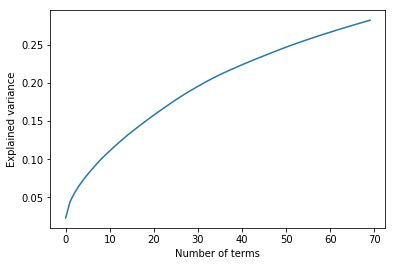

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


cumulative = np.cumsum(lsa_cv.explained_variance_ratio_)
plt.plot(cumulative)
plt.xlabel('Number of terms')
plt.ylabel('Explained variance')

In [43]:
index = np.argmax(cumulative > 0.95) + 1
index, cumulative[index]

(1, 0.04437363830145813)

### NOw for Clustering

In [16]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(cv_data)

clusters = km.labels_.tolist()

In [ ]:
mu_digits = km.cluster_centers_

In [17]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [23]:
from sklearn import metrics

SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cv_data)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(cv_data, labels, metric='euclidean'))
    SSEs.append(get_SSE(cv_data, labels)) # The SSE is just inertia, we could have just said km.inertia_

LinAlgError: Last 2 dimensions of the array must be square

In [25]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=2))

# plot Intertia/SSE on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

ValueError: x and y must have same first dimension, but have shapes (18,) and (1,)